In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Indian automoble buying behavour study 1.0.csv')
display(df.sample(5))

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
5,28,Salaried,Married,Graduate,3,Yes,Yes,No,900000,0,900000,Baleno,700000
8,34,Business,Married,Post Graduate,4,No,No,No,2000000,0,2000000,Verna,1100000
77,36,Business,Married,Graduate,3,No,Yes,Yes,1800000,1100000,2900000,SUV,1600000
55,41,Salaried,Married,Post Graduate,3,Yes,Yes,No,3100000,0,3100000,Creata,1500000


In [2]:
df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [4]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
cat_cols=[column for column in df.columns if df[column].dtype == 'object']
num_cols=[column for column in df.columns if column not in cat_cols]
num_cols

['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

In [6]:
for col in cat_cols:
    print('unique values in {} are {}'.format(col,df[col].value_counts()))

unique values in Profession are Profession
Salaried    64
Business    35
Name: count, dtype: int64
unique values in Marrital Status are Marrital Status
Married    84
Single     15
Name: count, dtype: int64
unique values in Education are Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64
unique values in Personal loan are Personal loan
No     67
Yes    32
Name: count, dtype: int64
unique values in House Loan are House Loan
No     62
Yes    37
Name: count, dtype: int64
unique values in Wife Working are Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64
unique values in Make are Make
SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: count, dtype: int64


In [7]:
df.loc[df['Wife Working']=='m']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [8]:
df.loc[df['Wife Working'] == 'm', 'Wife Working'] = 'No'
df.loc[df['Wife Working']=='m']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price


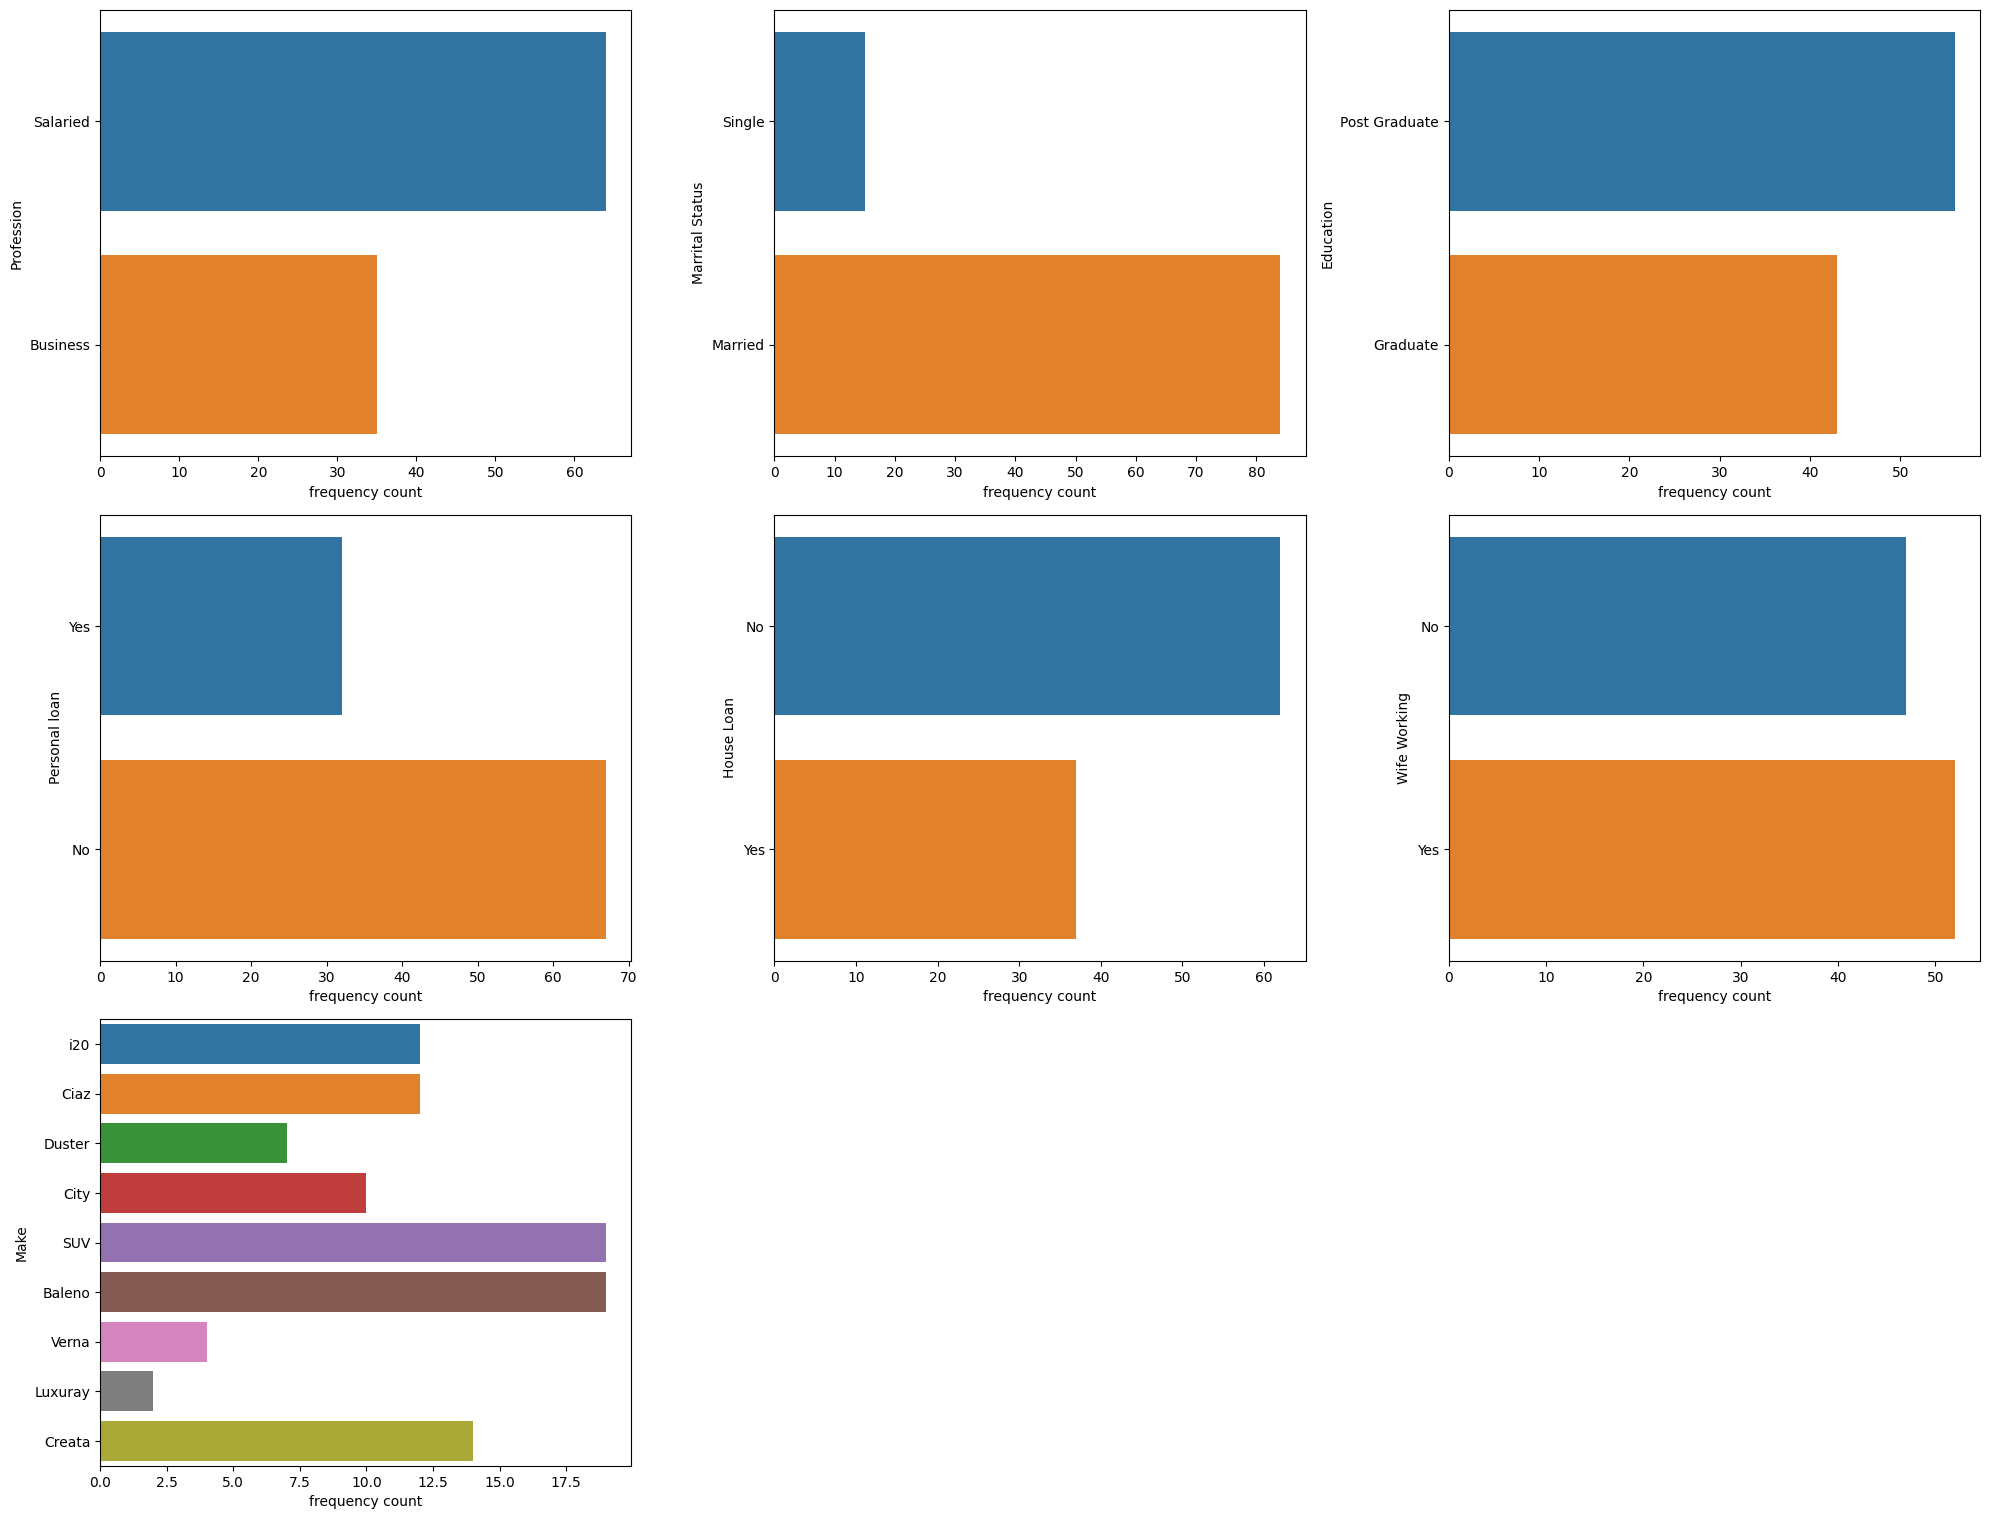

In [9]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,30))
for i,col in enumerate(cat_cols):
    plt.subplot(6,3,i+1)
    sns.countplot(y=col,data=df)
    plt.ylabel(col)
    plt.xlabel('frequency count')
    plt.tight_layout()

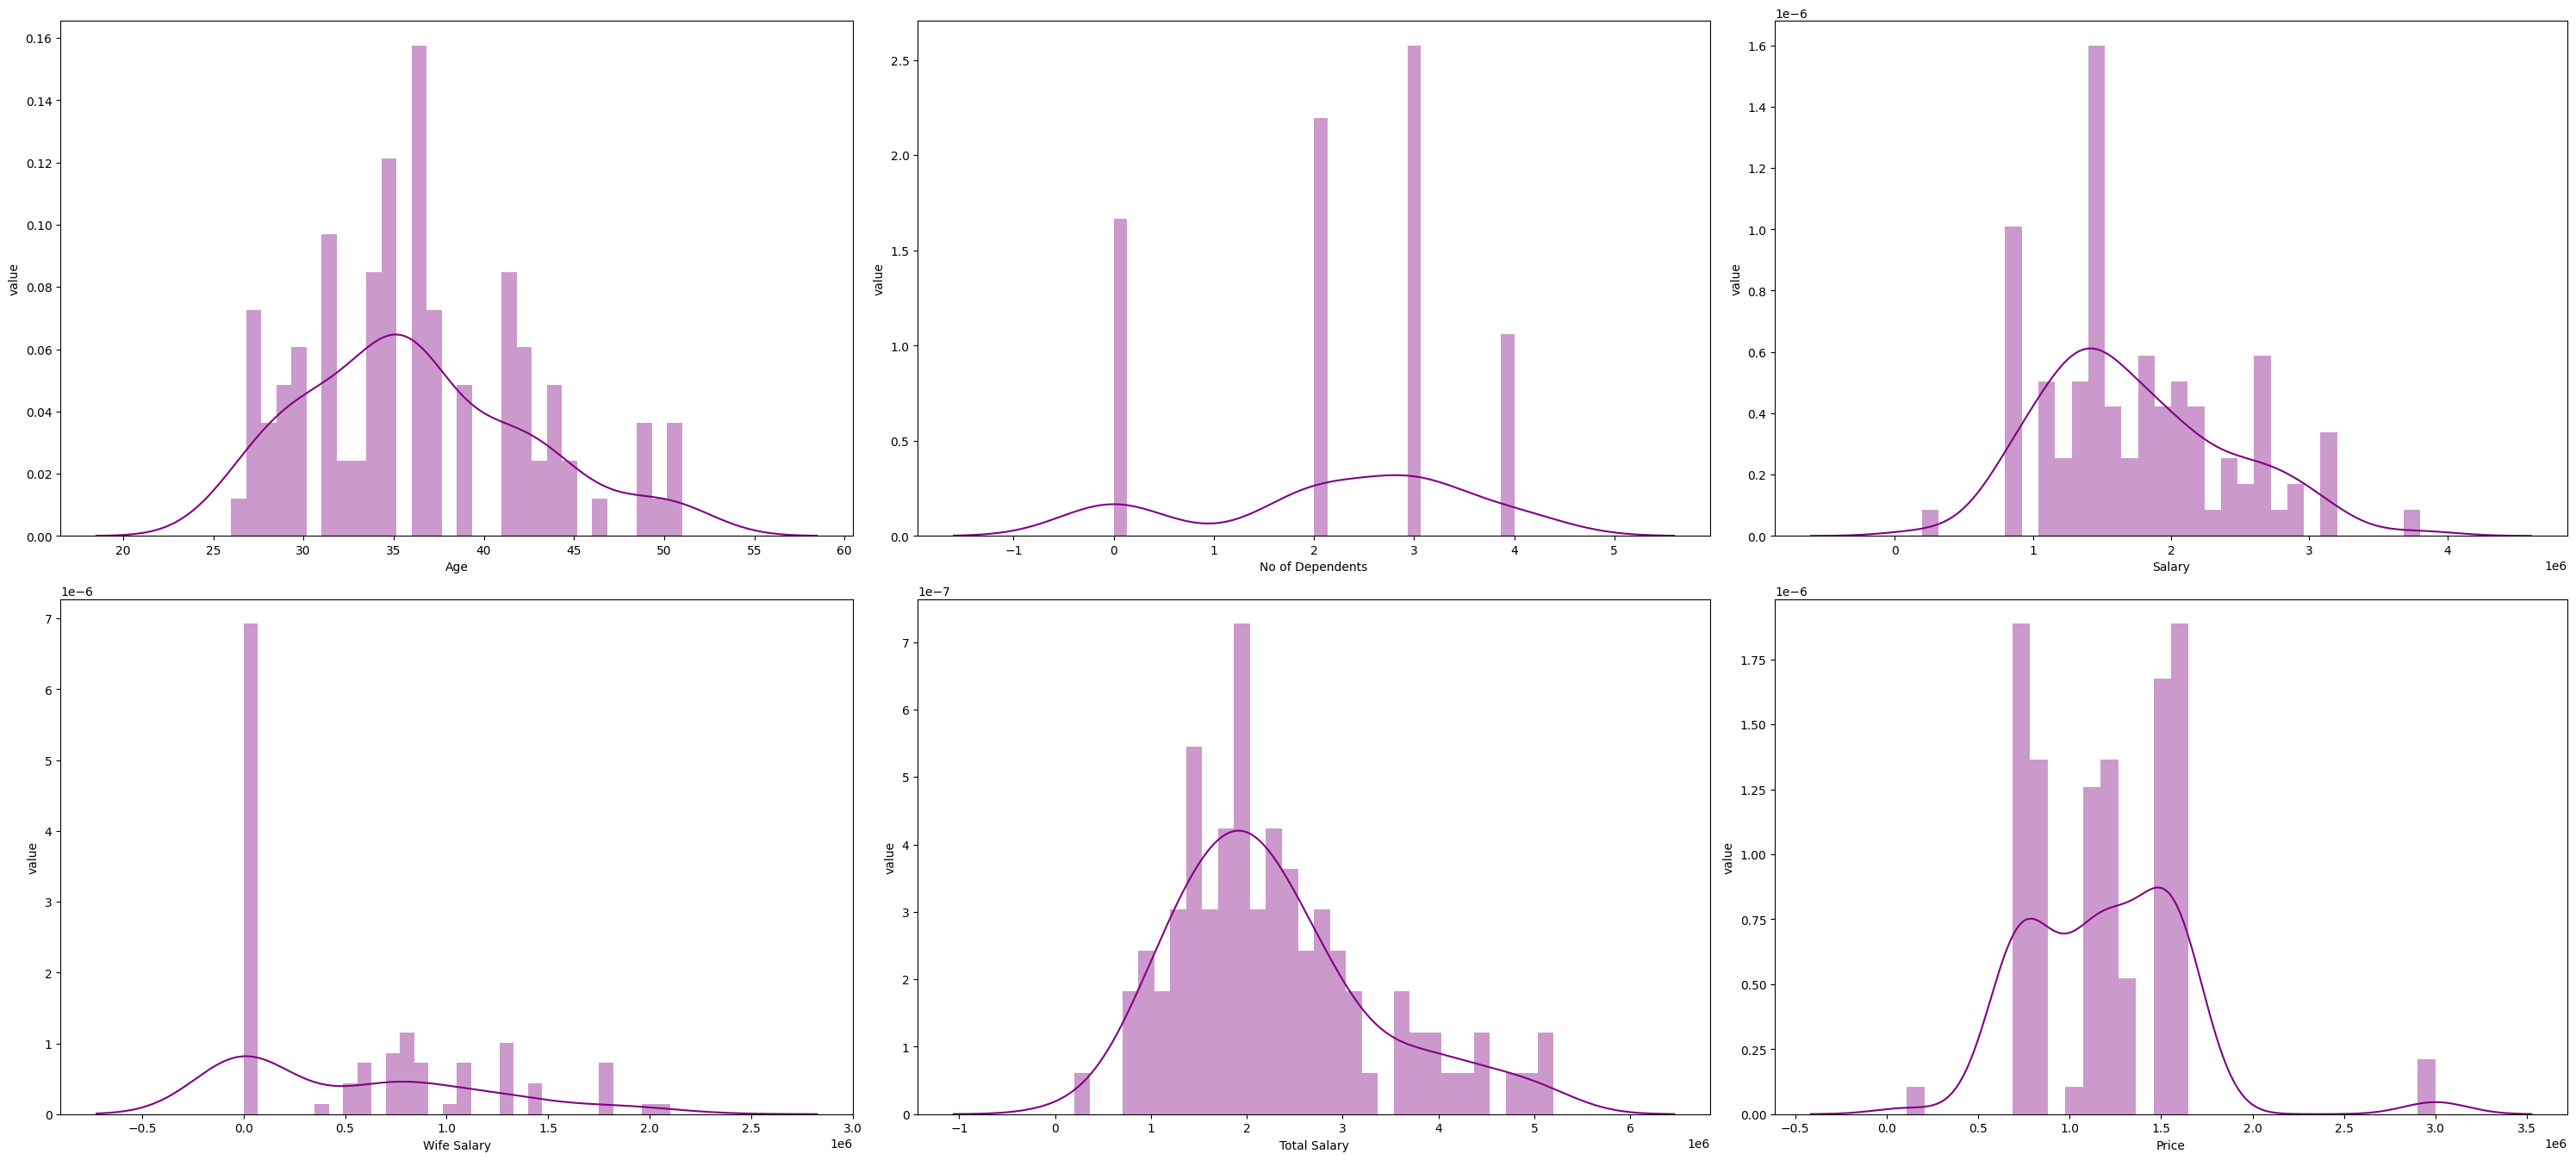

In [10]:
plt.figure(figsize=(30,40))
for i,col in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    sns.distplot(x=df[col],color='purple',kde=True, bins=30)
    plt.ylabel('value')
    plt.xlabel(col)
    plt.tight_layout()

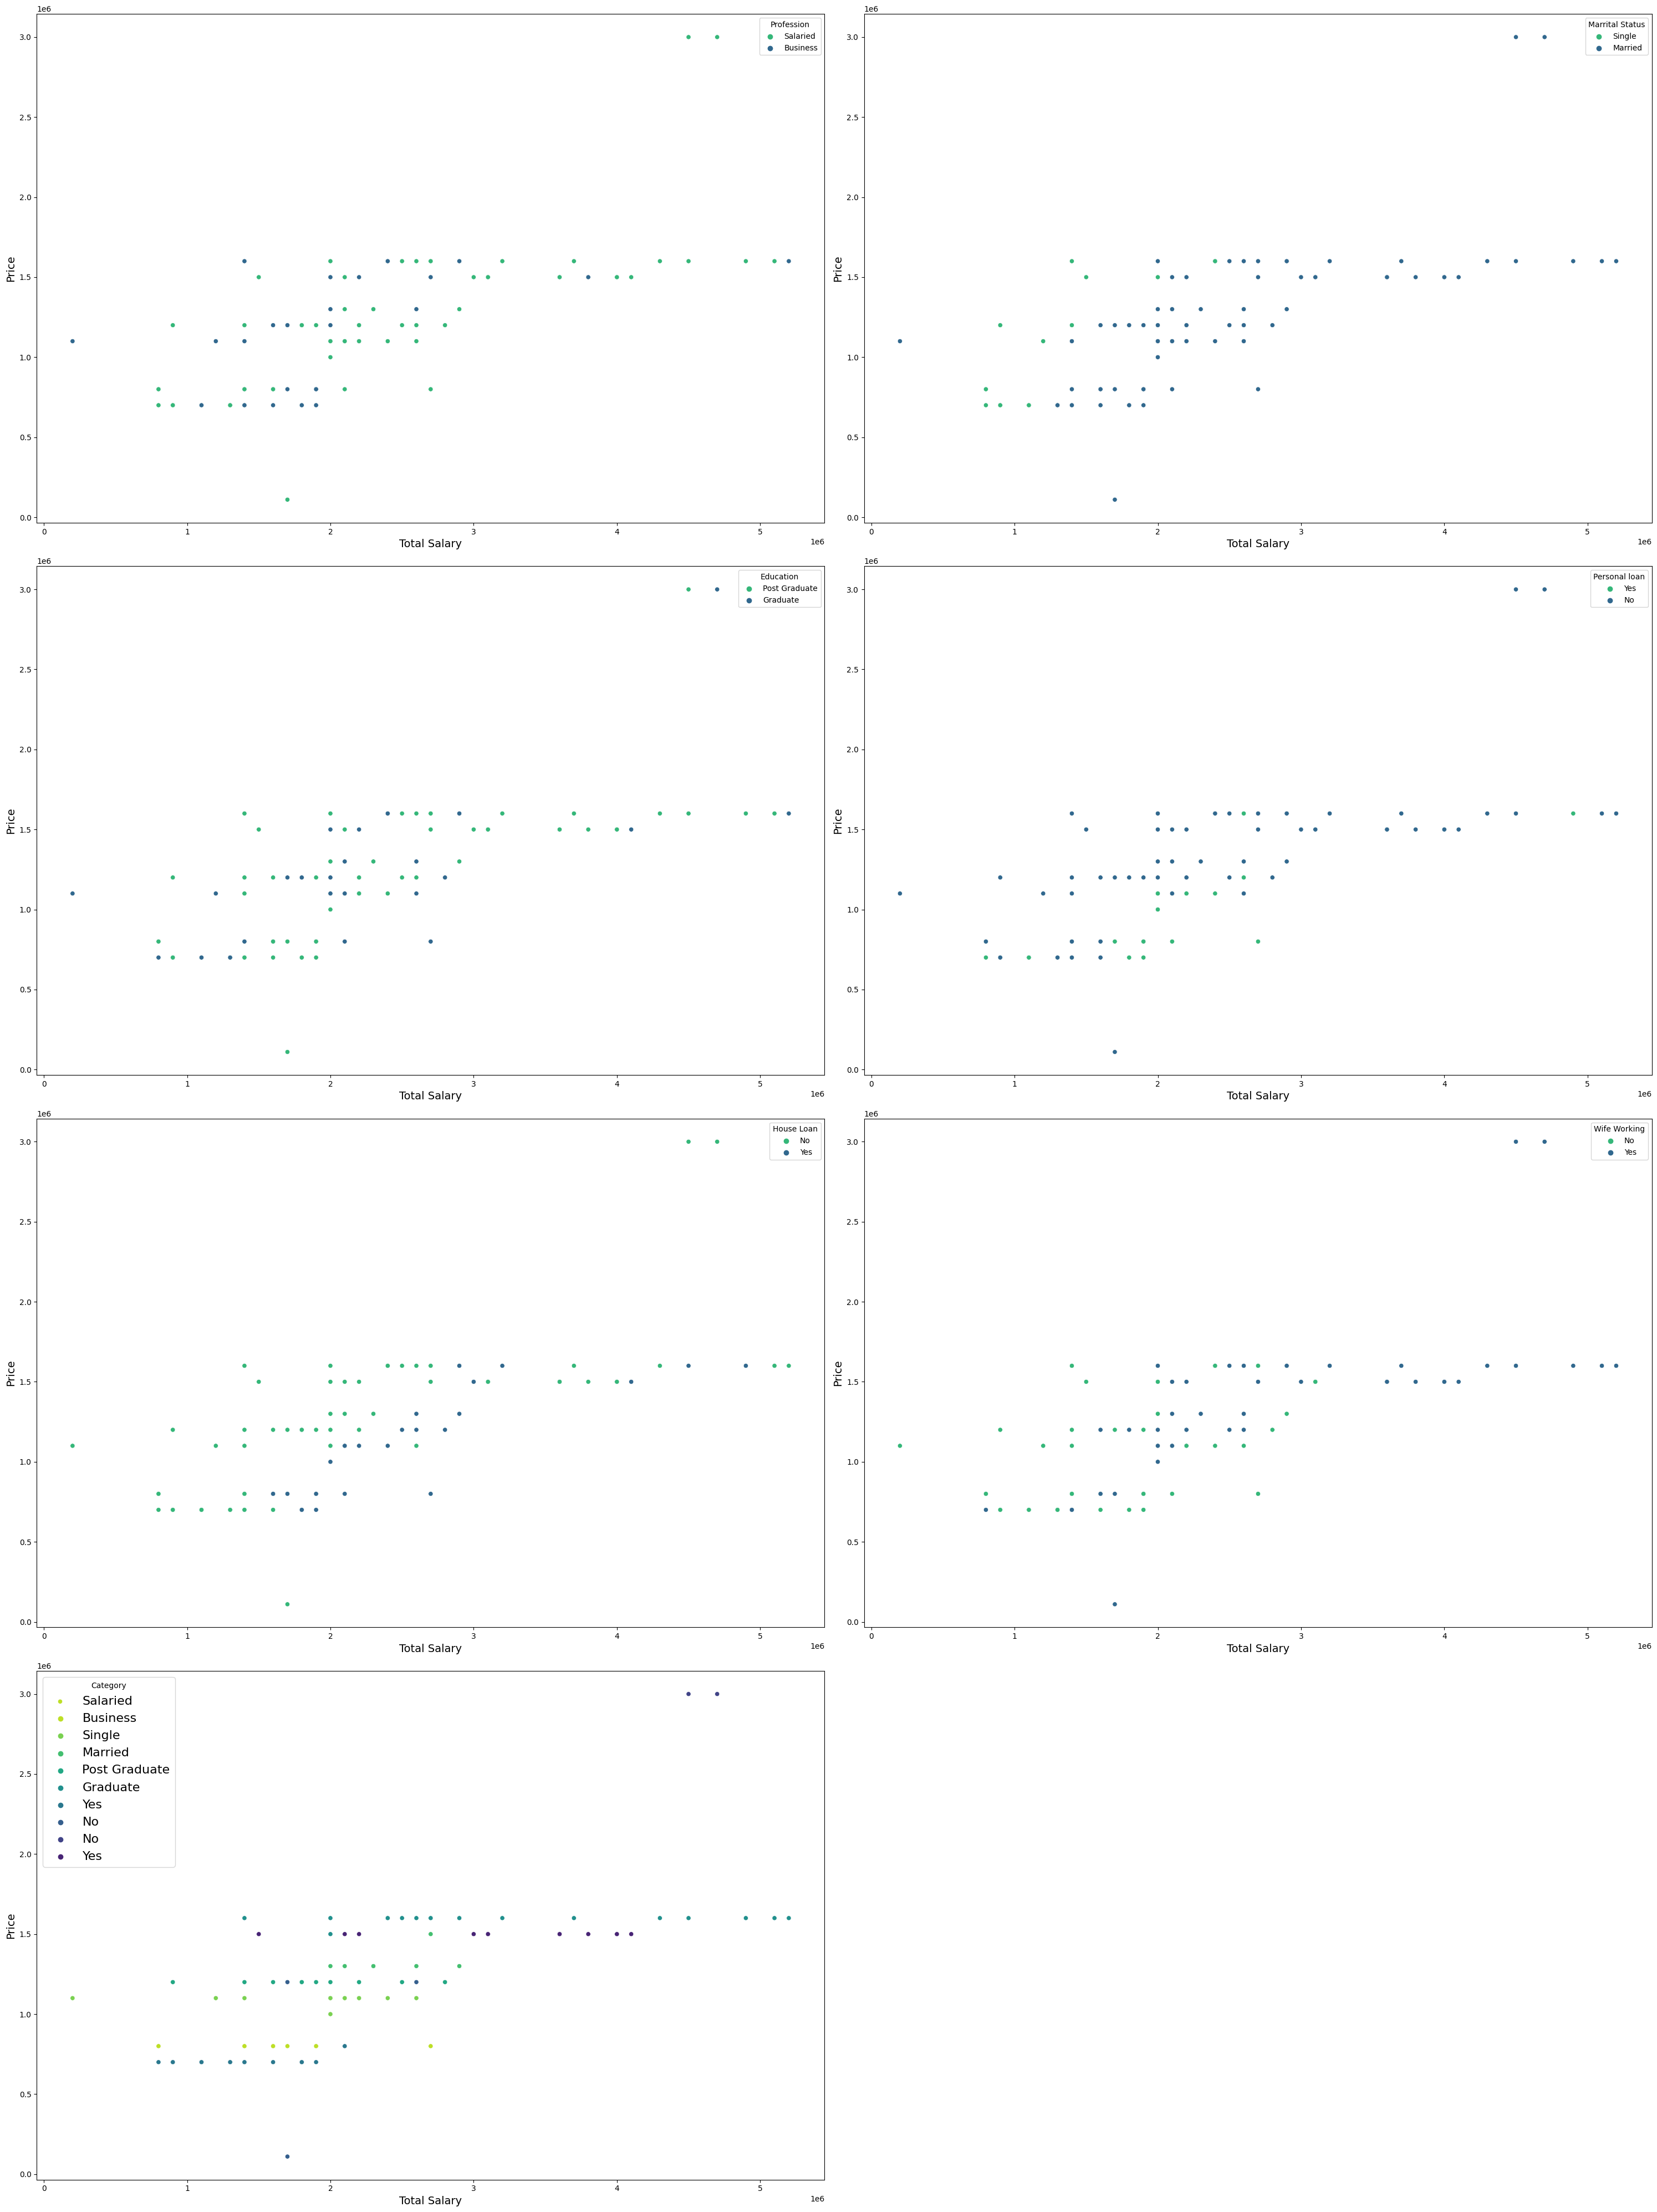

In [11]:
plt.figure(figsize=(30, 40))

# Create an empty list to store unique legend labels
legend_labels = []

for i, col in enumerate(cat_cols):
    ax = plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=df, x='Total Salary', y='Price', hue=col, style=None, palette='viridis_r')
    plt.ylabel('Price', fontsize=14)  # Increase the font size of the y-axis label
    plt.xlabel('Total Salary', fontsize=14)  # Increase the font size of the x-axis label
    plt.tight_layout()

    # Get the unique values from the hue column
    unique_values = df[col].unique()
    # Store unique values as legend labels
    legend_labels.extend(unique_values)

plt.legend(title='Category', labels=legend_labels, fontsize=16)
plt.show()

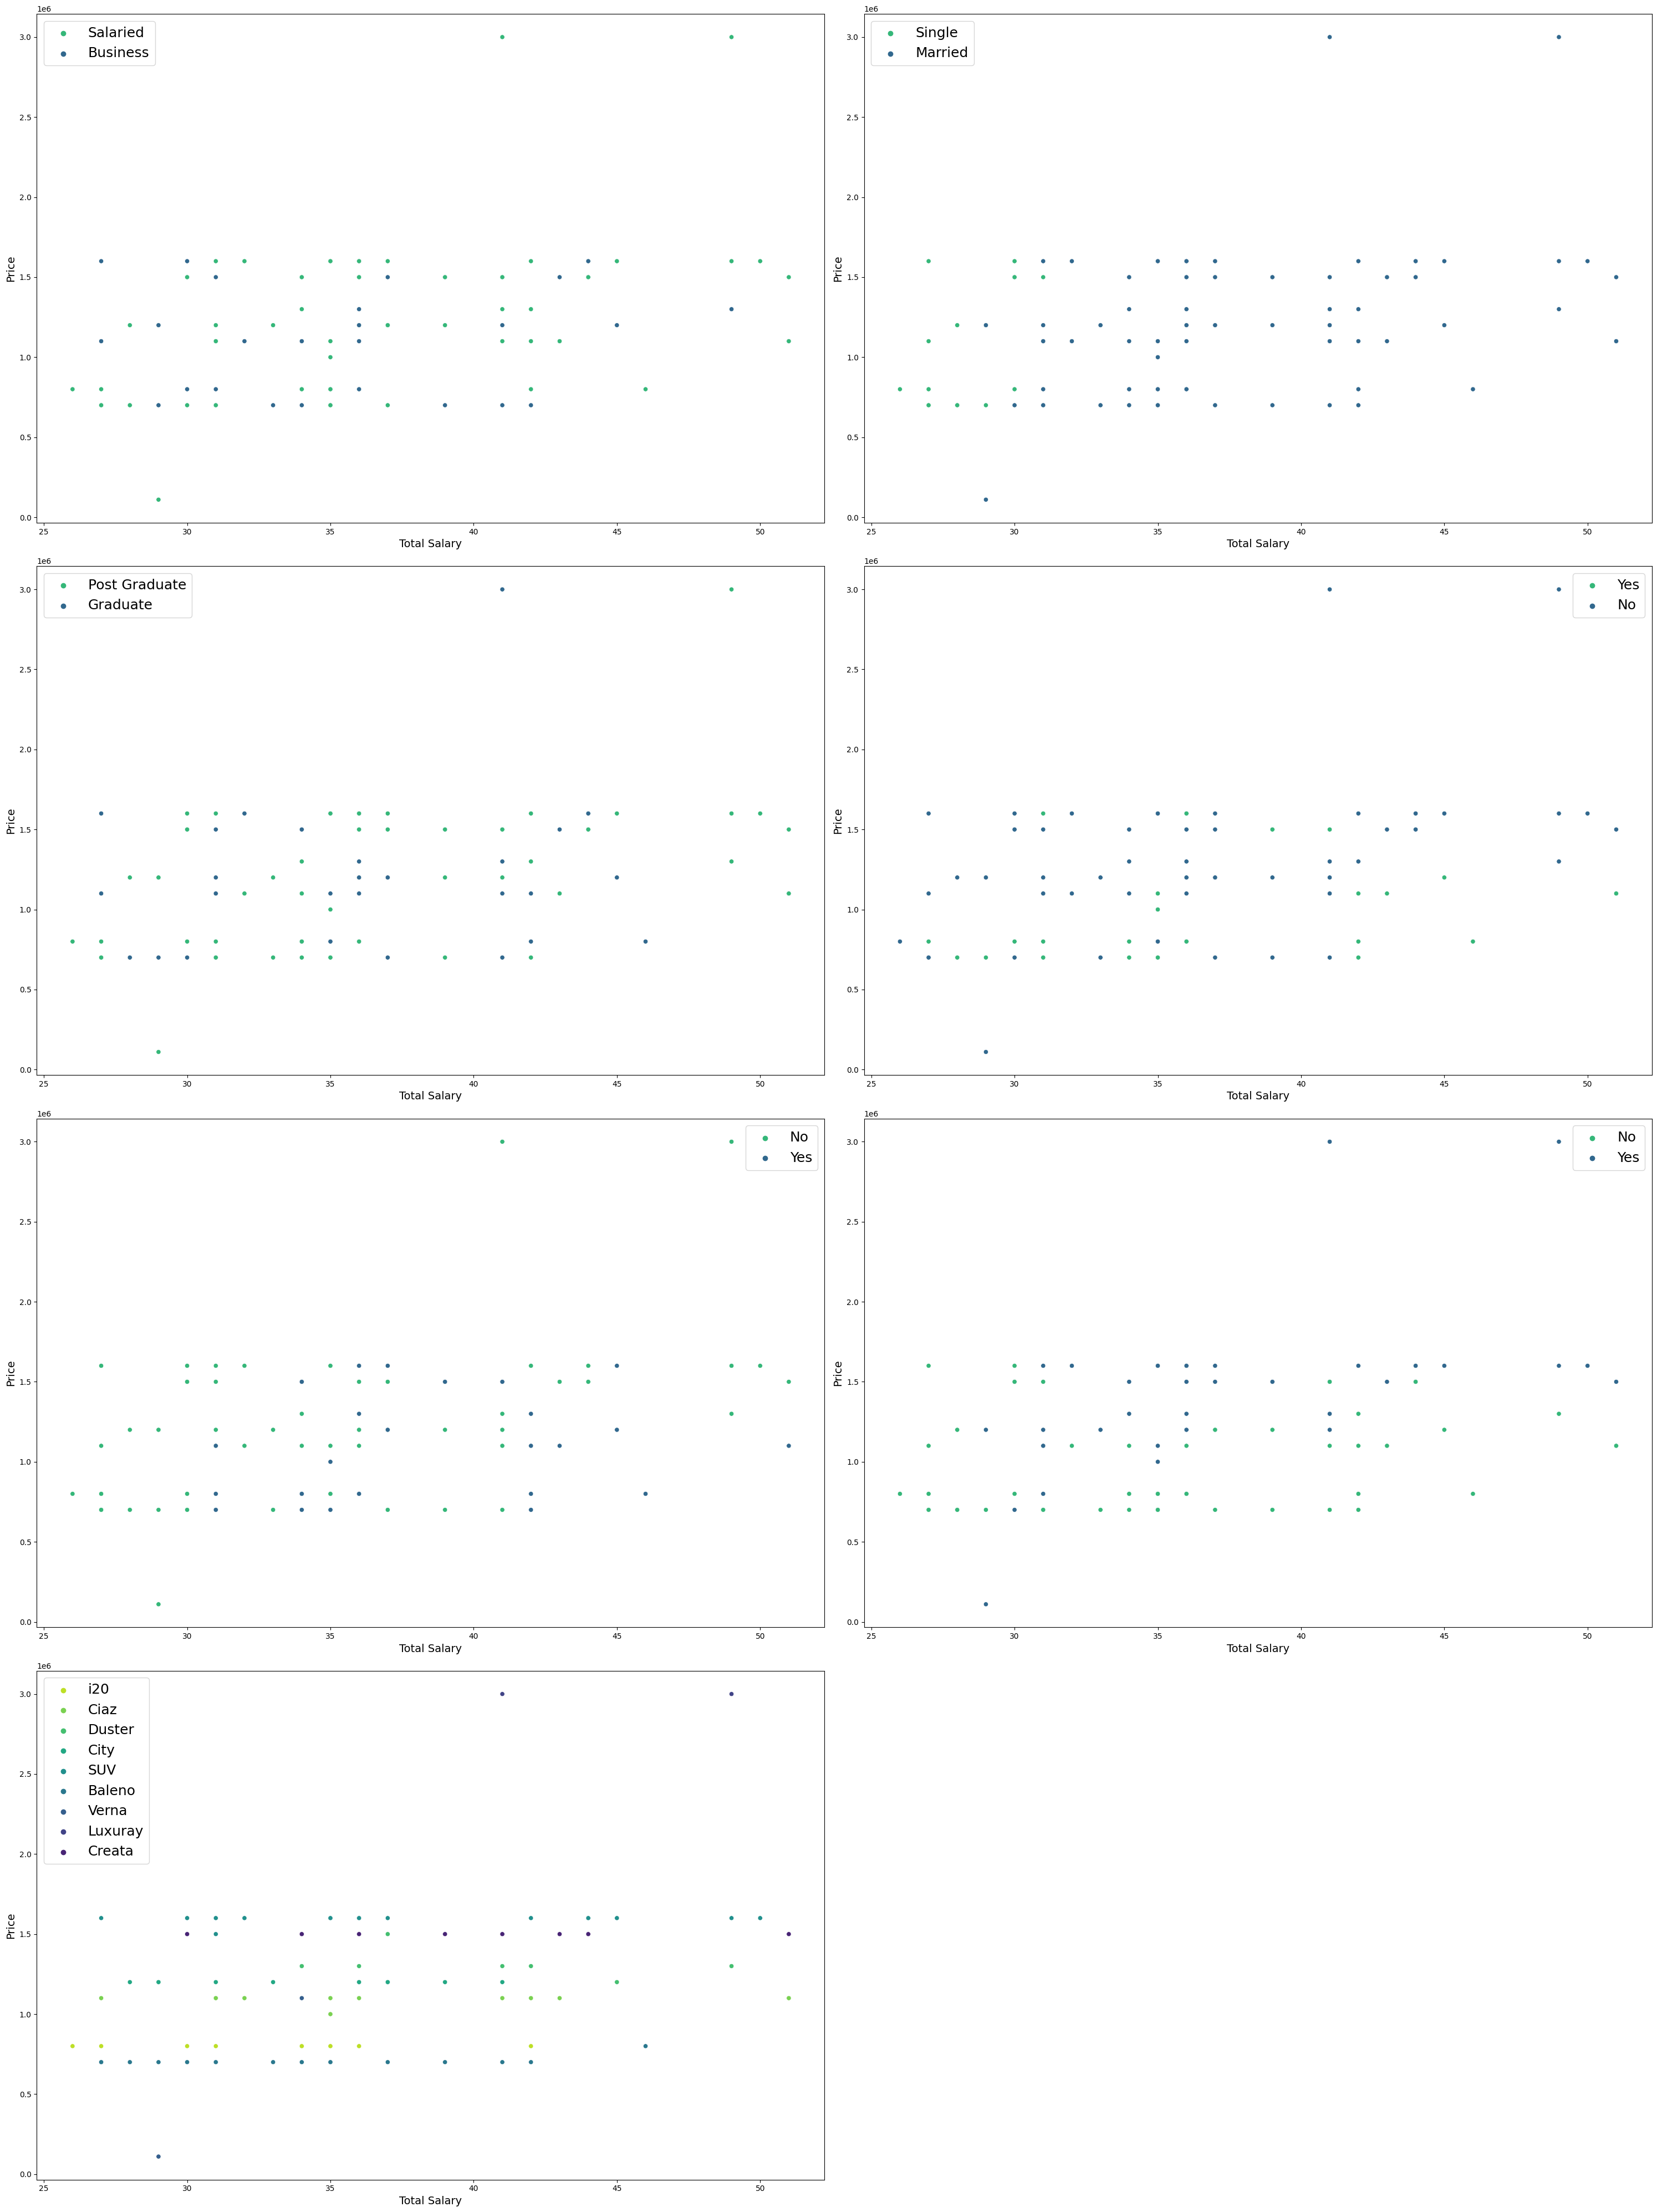

In [12]:
plt.figure(figsize=(30, 40))

# Create an empty list to store unique legend labels
legend_labels = []

for i, col in enumerate(cat_cols):
    ax = plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=df, x='Age', y='Price', hue=col, style=None, palette='viridis_r')
    plt.ylabel('Price', fontsize=14)  # Increase the font size of the y-axis label
    plt.xlabel('Total Salary', fontsize=14)  # Increase the font size of the x-axis label
    plt.legend(fontsize=18)
    plt.tight_layout()

plt.show()

<AxesSubplot: xlabel='Price'>

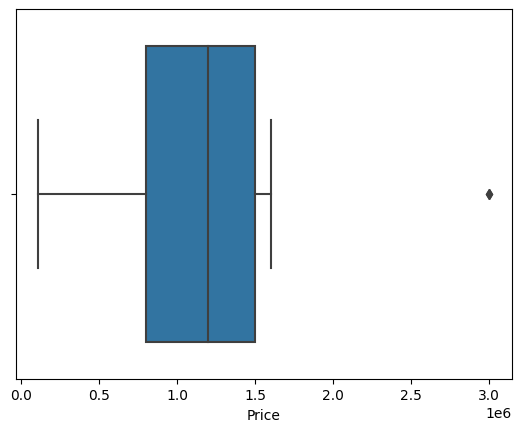

In [13]:
sns.boxplot(data=df, x='Price',hue='Make')

In [14]:
df.Price.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    9.900000e+01
mean     1.194040e+06
std      4.376955e+05
min      1.100000e+05
5%       7.000000e+05
25%      8.000000e+05
50%      1.200000e+06
75%      1.500000e+06
90%      1.600000e+06
95%      1.600000e+06
99%      3.000000e+06
max      3.000000e+06
Name: Price, dtype: float64

<AxesSubplot: xlabel='Age'>

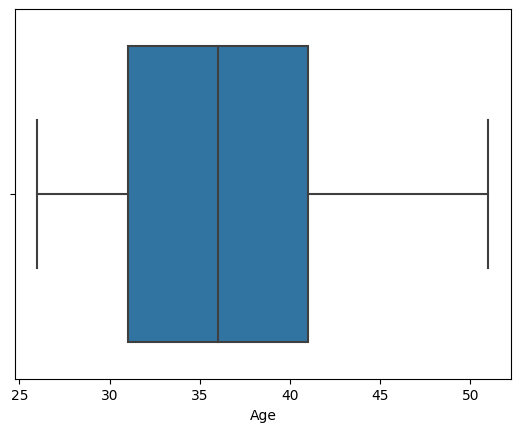

In [15]:
sns.boxplot(data=df, x='Age',hue='Make')

In [16]:
df.Age.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    99.000000
mean     36.313131
std       6.246054
min      26.000000
5%       27.000000
25%      31.000000
50%      36.000000
75%      41.000000
90%      44.200000
95%      49.000000
99%      51.000000
max      51.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Total Salary'>

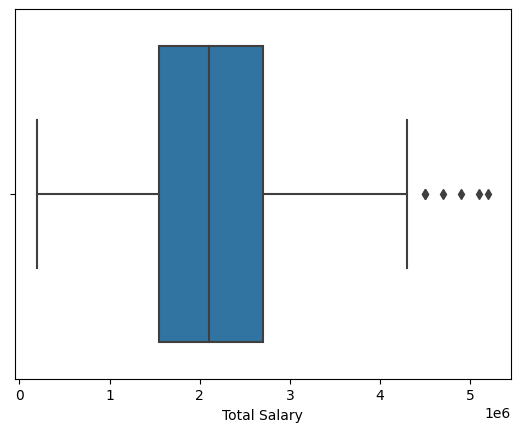

In [17]:
sns.boxplot(data=df, x='Total Salary',hue='Make')

In [18]:
df['Total Salary'].describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    9.900000e+01
mean     2.270707e+06
std      1.050777e+06
min      2.000000e+05
5%       9.000000e+05
25%      1.550000e+06
50%      2.100000e+06
75%      2.700000e+06
90%      3.840000e+06
95%      4.500000e+06
99%      5.102000e+06
max      5.200000e+06
Name: Total Salary, dtype: float64

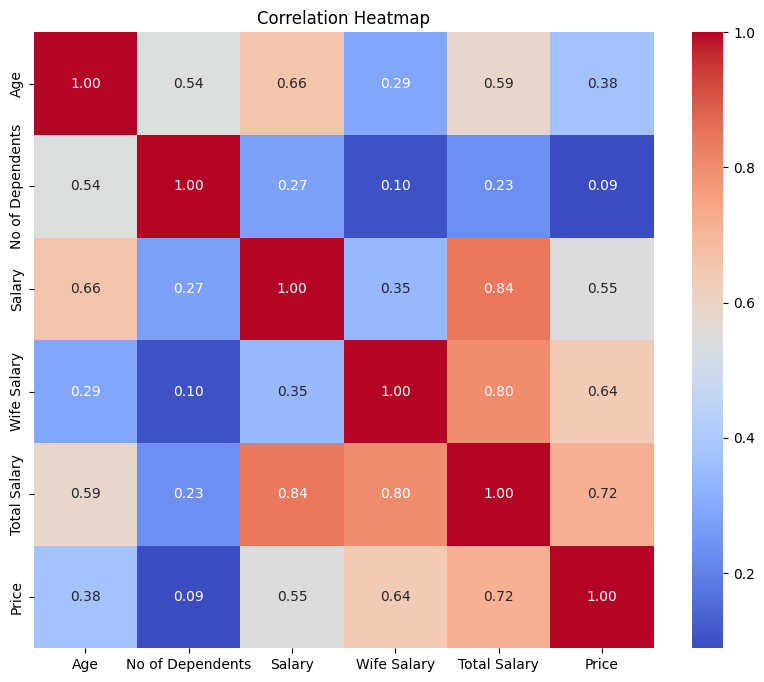

In [19]:
correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])
df.head(4)

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000


In [21]:
from sklearn.cluster import KMeans
X=df[num_cols+cat_cols]
wcss=[]
max_clusters=10
for i in range(1,max_clusters+1):
    kmeans=KMeans(init='k-means++', n_clusters=i, max_iter=400,n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

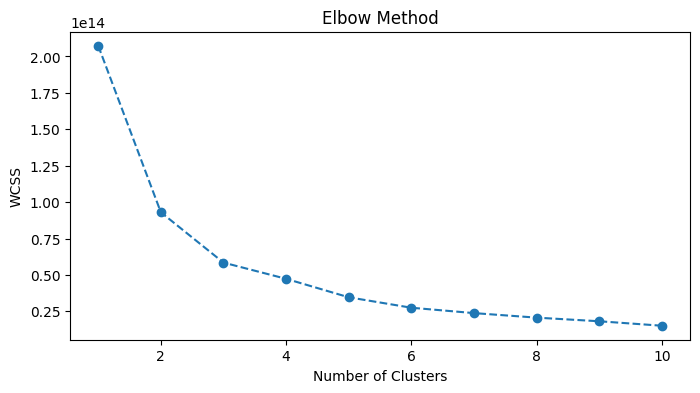

In [22]:
plt.figure(figsize=(8,4))
plt.plot(range(1,max_clusters+1),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score
optimal_clusters = 4

# Perform segmentation using K-Means
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Evaluate the segmentation (e.g., using silhouette score)
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4419897987679049


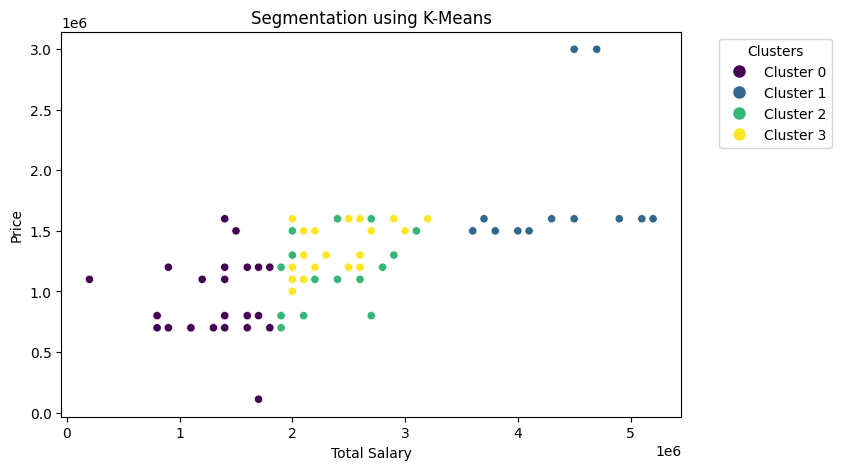

In [24]:
cmap = plt.cm.get_cmap('viridis', len(df['Cluster'].unique()))
cluster_colors = [cmap(i) for i in range(len(df['Cluster'].unique()))]

plt.figure(figsize=(8, 5))
# Scatterplot with custom colors
sns.scatterplot(data=df, x='Total Salary', y='Price', hue='Cluster', palette=cluster_colors)
plt.title('Segmentation using K-Means')
unique_labels = np.unique(df['Cluster'])
legend_labels = [f'Cluster {label}' for label in unique_labels]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cluster_colors[i],
                      markersize=10, label=legend_labels[i]) for i in range(len(unique_labels))]

plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

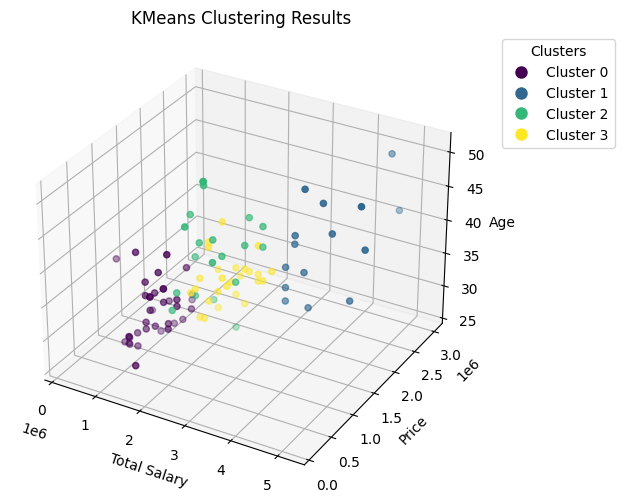

In [28]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')

scatter=ax.scatter(df['Total Salary'], df['Price'],df['Age'],c=df['Cluster'], cmap='viridis')
ax.set_xlabel('Total Salary')
ax.set_ylabel('Price')
ax.set_zlabel('Age')
ax.set_title('KMeans Clustering Results')

clusters=np.unique(df['Cluster'])
labels=[f'Cluster {cluster}' for cluster in clusters]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), 
                      markersize=10, label=labels[i]) for i, label in enumerate(clusters)]

ax.legend(handles=handles, title='Clusters',bbox_to_anchor=(1.05, 1), loc='upper left')

In [27]:
unique_clusters = df['Cluster'].unique()

for cluster_value in unique_clusters:
    # Create a subset of the DataFrame for the current cluster
    cluster_data = df[df['Cluster'] == cluster_value]
    
    summary_stats = cluster_data.describe()
    print(f"Summary statistics for Cluster {cluster_value}:\n{summary_stats}\n")

Summary statistics for Cluster 0:
             Age  Profession  Marrital Status  Education  No of Dependents  \
count  38.000000   38.000000        38.000000  38.000000         38.000000   
mean   32.026316    0.552632         0.342105   0.552632          1.815789   
std     4.181600    0.503897         0.480783   0.503897          1.591451   
min    26.000000    0.000000         0.000000   0.000000          0.000000   
25%    29.000000    0.000000         0.000000   0.000000          0.000000   
50%    31.000000    1.000000         0.000000   1.000000          2.000000   
75%    35.000000    1.000000         1.000000   1.000000          3.000000   
max    42.000000    1.000000         1.000000   1.000000          4.000000   

       Personal loan  House Loan  Wife Working        Salary    Wife Salary  \
count      38.000000   38.000000     38.000000  3.800000e+01      38.000000   
mean        0.368421    0.289474      0.289474  1.178947e+06  160526.315789   
std         0.488852    0.